In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import metrics


dataset = pd.read_csv("Second_week_second_dataset.csv",index_col = 'Unnamed: 0')

dataset

,X,Y
0,5.432943,0.109422
1,-9.101988,7.139412
2,1.402974,0.376474
3,5.578543,0.229852
4,1.392159,8.419821
...,...,...
995,-9.795986,4.938351
996,0.930429,9.661312
997,2.716334,8.113785
998,-9.226332,-8.086170


,X,Y,clast
0,5.432943,0.109422,0
1,-9.101988,7.139412,0
2,1.402974,0.376474,0
3,5.578543,0.229852,0
4,1.392159,8.419821,0
...,...,...,...
995,-9.795986,4.938351,0
996,0.930429,9.661312,0
997,2.716334,8.113785,0
998,-9.226332,-8.086170,1


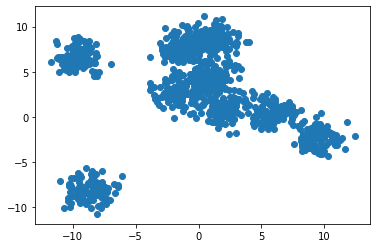

In [2]:
plt.scatter(dataset.X,dataset.Y)
claster = AgglomerativeClustering(linkage='single').fit(dataset)

dataset["clast"]=claster.labels_

dataset

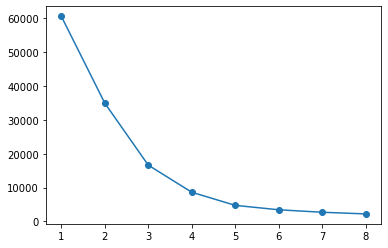

In [3]:
SSE = [] 

for k in range(1, 9):
    estimator = KMeans(n_clusters=k)
    estimator.fit(dataset)
    SSE.append(estimator.inertia_)

X = range(1, 9)
plt.plot(X, SSE, 'o-')

In [4]:
SSE

[60573.05376769457,
 34927.13184842259,
 16619.028558956237,
 8617.09896312384,
 4740.129434019402,
 3435.8566780421406,
 2704.797365732834,
 2213.9120241245855]

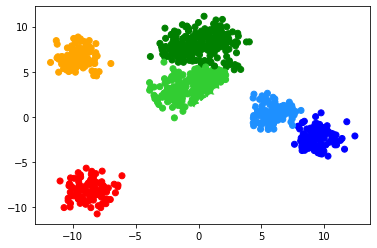

In [5]:
model = KMeans(n_clusters=7)
s = model.fit(dataset)
l = model.predict(dataset)

dataset['clast'] = l

col1 = {0:'green',1:'red',2:"blue",3:"orange",4:"white",5:'dodgerblue',6:'limegreen',7:"purple"}

col = [col1[i] for i in dataset.clast]
s = plt.scatter(dataset.X, dataset.Y, c=col)

In [6]:
metrics.silhouette_score(dataset, l, metric='euclidean')

0.6537324316287167